<a href="https://colab.research.google.com/github/niranjana2222/Heuristic-for-Classifying-DNA-Strands/blob/main/parametrization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


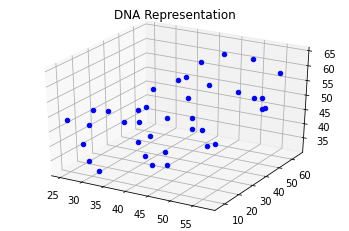

<ipython-input-5-1a43e0c5fdcd>:61: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = plt.subplot(111, projection="3d")


fitted parameters [-107.43664047    0.23560747   41.214057  ]
[39.67871793 40.38858173 41.05389374 42.00209337 43.02828983 44.12938279
 44.45514114 45.59784638 46.24477508 48.77756389 49.55384931 50.294375
 50.86434285 51.11272383 51.36448793 51.62587955 51.98161679 52.44259991
 54.19133449 52.99320933 51.76640081 50.6839222  49.45270124 48.51246595
 48.05398959 47.33370994 46.99968922 46.62246759 46.15763333 45.26807414
 44.23322563 43.53285288 42.78304128 42.1060869  41.23298236 40.49479752
 39.01225417]
RMSE: 7.686799183901045
R-squared: 0.23497399163898025


In [ ]:
!pip install Bio

from Bio.PDB import *
import numpy as np
import math
import numpy, scipy, scipy.optimize
import matplotlib
from mpl_toolkits.mplot3d import  Axes3D
from matplotlib import cm # to colormap 3D surfaces from blue to red
import matplotlib.pyplot as plt


file = open('/content/1x9n.pdb', 'r')
count = 0
xs = []
ys = []
zs = []
while True:


    line = file.readline()

    if not line:
        break
    a = line.split()
    b = 0



    if a[-1] == 'P':
        if a[0] == "ATOM":
            xs.append(float(a[-6]))
            ys.append(float(a[-5]))
            zs.append(float(a[-4]))


fig = plt.figure()
ax = plt.axes(projection='3d')
for x in xs:
    y = ys[xs.index(x)]
    y = float(y)
    z = zs[xs.index(x)]
    #x = float(x)
    ax.scatter(x, y, z, c = "blue")
ax.set_title("DNA Representation")
plt.show()



xs = np.array(xs)
ys = np.array(ys)
zs = np.array(zs)
data = [xs, ys, zs]

def SurfacePlot(func, data, fittedParameters):
    f = plt.figure(figsize=(100, 100), dpi=100)

    matplotlib.pyplot.grid(True)
    axes = plt.subplot(111, projection="3d")

    # extract data from the single list
    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = np.linspace(min(x_data), max(x_data), 20)
    yModel = np.linspace(min(y_data), max(y_data), 20)
    X, Y = np.meshgrid(xModel, yModel)

    Z = func(np.array([X, Y]), *fittedParameters)

    axes.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=1, antialiased=True)

    axes.scatter(x_data, y_data, z_data) # show data along with plotted surface

    axes.set_title('Surface Plot (click-drag with mouse)') # add a title for surface plot
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label
    axes.set_zlabel('Z Data') # Z axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot or else there can be memory and process problems

def ContourPlot(func, data, fittedParameters):
    f = plt.figure(figsize=(100.0, 100.0), dpi=100)
    axes = f.add_subplot(111)

    # extract data from the single list
    x_data = data[0]
    y_data = data[1]
    z_data = data[2]

    xModel = numpy.linspace(min(x_data), max(x_data), 20)
    yModel = numpy.linspace(min(y_data), max(y_data), 20)
    X, Y = numpy.meshgrid(xModel, yModel)

    Z = func(numpy.array([X, Y]), *fittedParameters)

    axes.plot(x_data, y_data, 'o')

    axes.set_title('Contour Plot') # add a title for contour plot
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    CS = matplotlib.pyplot.contour(X, Y, Z, 16, colors='k')
    matplotlib.pyplot.clabel(CS, inline=1, fontsize=10) # labels for contours

    plt.show()
    plt.close('all') # clean up after using pyplot or else there can be memory and process problems

def func(data, a1, a2, b):

    # extract data from the single list
    x1 = data[0]
    x2 = data[1]

    return (a1/x1)+a2*x2+b


initialParameters = [1.0, 1.0, 1.0] # these are the same as scipy default values in this example

# here a non-linear surface fit is made with scipy's curve_fit()
fittedParameters, pcov = scipy.optimize.curve_fit(func, [xs, ys], zs, p0 = initialParameters)
SurfacePlot(func, data, fittedParameters)

#SurfacePlot(func, data,fittedParameters)
print('fitted parameters', fittedParameters)

modelPredictions = func(data, *fittedParameters)

absError = modelPredictions - zs
print(modelPredictions)

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(zs))
print('RMSE:', RMSE)
print('R-squared:', Rsquared)